FIRST, I IMPORT ALL THE NECESSARY THINGS NEEDED FOR THE DATASET

In [493]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ipipeline
from imblearn.pipeline import Pipeline 

SINCE THE COLUMNS ARE ALOT I USE THIS CODE TO DISPLAY ALL OF THEM

In [359]:
pd.set_option("display.max_columns", None)

THEN I IMPORT MY DATASET AND PERFORM SOME DESCRIPTIVE ANALYSIS TO GET SOME INFO ABOUT IT

In [360]:
train_df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\patient_train_data.csv")
test_df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\patient_test_data.csv")

In [361]:
train_df.head(2)

,ID,Alcohol Consumption,Cancer Stage,Country,Date of Birth,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,Healthcare Access,Healthcare Costs,Heart Disease History,Hypertension,Incidence Rate per 100K,Inflammatory Bowel Disease,Insurance Costs,Insurance Status,Marital Status,Mortality Rate per 100K,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Transfusion History,Treatment Type,Tumor Size (mm),Urban or Rural,Survival Prediction
0,1,No,Localized,UK,29-01-1966,No,No,Moderate,No,No,M,No,High,76553.0,No,Yes,37.0,No,Basic,Uninsured,NaN,25.0,Yes,Overweight,Low,Regular,No,-,Chemotherapy,33.0,Urban,Yes
1,2,No,Regional,Japan,21-12-1958,No,No,Low,No,No,M,No,Moderate,62805.0,No,No,54.0,Yes,No insurance,Uninsured,NaN,27.0,No,Normal,Low,Irregular,Yes,-,Chemotherapy,17.0,Urban,No


In [362]:
test_df.head(2)

,ID,Alcohol Consumption,Cancer Stage,Country,Date of Birth,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,Healthcare Access,Healthcare Costs,Heart Disease History,Hypertension,Incidence Rate per 100K,Inflammatory Bowel Disease,Insurance Costs,Insurance Status,Marital Status,Mortality Rate per 100K,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Transfusion History,Treatment Type,Tumor Size (mm),Urban or Rural
0,75036,Yes,Localized,UK,17-11-1947,No,No,Low,Yes,No,M,No,Moderate,54413.0,No,No,50.0,No,Basic,Insured,NaN,5.0,Yes,Overweight,Low,Regular,No,-,Combination,69.0,Urban
1,75037,No,Regional,USA,26-03-1942,No,No,High,No,No,M,No,Moderate,89393.0,No,No,45.0,No,Basic,Insured,NaN,11.0,Yes,Obese,Low,Regular,No,-,Surgery,14.0,Urban


In [363]:
train_df.shape

(75035, 32)

In [364]:
test_df.shape

(75000, 31)

In [365]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75035 entries, 0 to 75034
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          75035 non-null  int64  
 1   Alcohol Consumption         74983 non-null  object 
 2   Cancer Stage                75022 non-null  object 
 3   Country                     74985 non-null  object 
 4   Date of Birth               74975 non-null  object 
 5   Diabetes                    75021 non-null  object 
 6   Diabetes History            75035 non-null  object 
 7   Diet Risk                   74987 non-null  object 
 8   Early Detection             75005 non-null  object 
 9   Family History              74989 non-null  object 
 10  Gender                      74956 non-null  object 
 11  Genetic Mutation            75005 non-null  object 
 12  Healthcare Access           74972 non-null  object 
 13  Healthcare Costs            749

In [366]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          75000 non-null  int64  
 1   Alcohol Consumption         74944 non-null  object 
 2   Cancer Stage                74990 non-null  object 
 3   Country                     74950 non-null  object 
 4   Date of Birth               74949 non-null  object 
 5   Diabetes                    74982 non-null  object 
 6   Diabetes History            75000 non-null  object 
 7   Diet Risk                   74963 non-null  object 
 8   Early Detection             74941 non-null  object 
 9   Family History              74935 non-null  object 
 10  Gender                      74935 non-null  object 
 11  Genetic Mutation            74982 non-null  object 
 12  Healthcare Access           74923 non-null  object 
 13  Healthcare Costs            749

In [367]:
train_df.isnull().sum()*100/len(train_df)

ID                              0.000000
Alcohol Consumption             0.069301
Cancer Stage                    0.017325
Country                         0.066636
Date of Birth                   0.079963
Diabetes                        0.018658
Diabetes History                0.000000
Diet Risk                       0.063970
Early Detection                 0.039981
Family History                  0.061305
Gender                          0.105284
Genetic Mutation                0.039981
Healthcare Access               0.083961
Healthcare Costs                0.070634
Heart Disease History           0.000000
Hypertension                    0.000000
Incidence Rate per 100K         0.047978
Inflammatory Bowel Disease      0.041314
Insurance Costs                 0.000000
Insurance Status                0.081295
Marital Status                100.000000
Mortality Rate per 100K         0.081295
Non Smoker                      0.000000
Obesity BMI                     0.031985
Physical Activit

In [368]:
test_df.isnull().sum()*100/len(test_df)

ID                              0.000000
Alcohol Consumption             0.074667
Cancer Stage                    0.013333
Country                         0.066667
Date of Birth                   0.068000
Diabetes                        0.024000
Diabetes History                0.000000
Diet Risk                       0.049333
Early Detection                 0.078667
Family History                  0.086667
Gender                          0.086667
Genetic Mutation                0.024000
Healthcare Access               0.102667
Healthcare Costs                0.072000
Heart Disease History           0.000000
Hypertension                    0.000000
Incidence Rate per 100K         0.022667
Inflammatory Bowel Disease      0.042667
Insurance Costs                 0.000000
Insurance Status                0.102667
Marital Status                100.000000
Mortality Rate per 100K         0.082667
Non Smoker                      0.000000
Obesity BMI                     0.034667
Physical Activit

In [369]:
train_df.nunique()

ID                            75035
Alcohol Consumption               2
Cancer Stage                      3
Country                          16
Date of Birth                 11062
Diabetes                          2
Diabetes History                  2
Diet Risk                         3
Early Detection                   2
Family History                    2
Gender                            3
Genetic Mutation                  2
Healthcare Access                 4
Healthcare Costs              51893
Heart Disease History             2
Hypertension                      2
Incidence Rate per 100K          75
Inflammatory Bowel Disease        2
Insurance Costs                   3
Insurance Status                  2
Marital Status                    0
Mortality Rate per 100K          35
Non Smoker                        2
Obesity BMI                       3
Physical Activity                 3
Screening History                 3
Smoking History                   2
Transfusion History         

ONCE SOME INFORMATIONS ARE GOTTEN DATA CLEANING SOME OTHER THINGS ARE DONE 

In [370]:
train_df['Date of Birth'] = pd.to_datetime(train_df['Date of Birth'], format='%d-%m-%Y')

In [371]:
test_df['Date of Birth'] = pd.to_datetime(test_df['Date of Birth'], format='%d-%m-%Y')

In [372]:
train_df['Age'] = pd.to_datetime('today').year - train_df['Date of Birth'].dt.year

In [373]:
test_df['Age'] = pd.to_datetime('today').year - test_df['Date of Birth'].dt.year

In [374]:
train_df['Transfusion History'].unique()

array(['-'], dtype=object)

In [375]:
train_df['Urban or Rural'].unique()

array(['Urban', 'Rural', 'urban', 'rural', nan], dtype=object)

In [376]:
train_df['Healthcare Access'].unique()

array(['High', 'Moderate', 'Low', '?', nan], dtype=object)

In [377]:
def clean_df(df):
    df.drop(columns = ['Marital Status', 'Transfusion History', 'Date of Birth'], inplace = True)
    df.dropna(inplace = True)
    return df

In [378]:
clean_df(train_df)
clean_df(test_df)

,ID,Alcohol Consumption,Cancer Stage,Country,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,Healthcare Access,Healthcare Costs,Heart Disease History,Hypertension,Incidence Rate per 100K,Inflammatory Bowel Disease,Insurance Costs,Insurance Status,Mortality Rate per 100K,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Treatment Type,Tumor Size (mm),Urban or Rural,Age
0,75036,Yes,Localized,UK,No,No,Low,Yes,No,M,No,Moderate,54413.0,No,No,50.0,No,Basic,Insured,5.0,Yes,Overweight,Low,Regular,No,Combination,69.0,Urban,78.0
1,75037,No,Regional,USA,No,No,High,No,No,M,No,Moderate,89393.0,No,No,45.0,No,Basic,Insured,11.0,Yes,Obese,Low,Regular,No,Surgery,14.0,Urban,83.0
2,75038,Yes,Localized,Germany,Yes,No,Low,Yes,Yes,F,No,High,62667.0,No,No,57.0,No,Basic,Uninsured,11.0,Yes,Overweight,High,Irregular,No,Radiotherapy,19.0,Rural,89.0
3,75039,Yes,Regional,Japan,No,No,High,Yes,No,F,No,High,92045.0,No,No,56.0,No,Basic,Uninsured,13.0,Yes,Normal,High,Never,No,Chemotherapy,71.0,urban,54.0
4,75040,No,Metastatic,Japan,No,No,Moderate,Yes,No,M,No,Low,70061.0,No,No,27.0,No,Basic,Uninsured,20.0,Yes,Overweight,Moderate,Irregular,No,Surgery,42.0,Urban,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,150031,Yes,Regional,South Korea,No,No,Low,Yes,No,M,No,High,77877.0,No,No,23.0,No,Basic,Insured,21.0,Yes,Normal,High,Irregular,No,Chemotherapy,68.0,Urban,69.0
74996,150032,No,Regional,Brazil,Yes,No,Low,Yes,No,M,No,Moderate,102931.0,No,No,40.0,No,Extended,Uninsured,22.0,No,Overweight,Low,Irregular,Yes,Surgery,70.0,Urban,81.0
74997,150033,No,Metastatic,Nigeria,No,No,Low,Yes,No,M,No,Moderate,61420.0,No,Yes,20.0,No,Extended,Insured,28.0,Yes,Normal,Moderate,Irregular,No,Chemotherapy,75.0,Urban,57.0
74998,150034,Yes,Localized,Germany,No,No,High,Yes,Yes,F,No,Moderate,74455.0,No,No,21.0,No,No insurance,Insured,21.0,Yes,Overweight,Moderate,Irregular,No,Chemotherapy,32.0,Urban,50.0


In [379]:
train_df.dtypes

ID                              int64
Alcohol Consumption            object
Cancer Stage                   object
Country                        object
Diabetes                       object
Diabetes History               object
Diet Risk                      object
Early Detection                object
Family History                 object
Gender                         object
Genetic Mutation               object
Healthcare Access              object
Healthcare Costs              float64
Heart Disease History          object
Hypertension                   object
Incidence Rate per 100K       float64
Inflammatory Bowel Disease     object
Insurance Costs                object
Insurance Status               object
Mortality Rate per 100K       float64
Non Smoker                     object
Obesity BMI                    object
Physical Activity              object
Screening History              object
Smoking History                object
Treatment Type                 object
Tumor Size (

In [380]:
train_df['Age'] = train_df['Age'].astype(int)

In [381]:
test_df['Age'] = test_df['Age'].astype(int)

In [382]:
train_df.isnull().sum()*100/len(train_df)

ID                            0.0
Alcohol Consumption           0.0
Cancer Stage                  0.0
Country                       0.0
Diabetes                      0.0
Diabetes History              0.0
Diet Risk                     0.0
Early Detection               0.0
Family History                0.0
Gender                        0.0
Genetic Mutation              0.0
Healthcare Access             0.0
Healthcare Costs              0.0
Heart Disease History         0.0
Hypertension                  0.0
Incidence Rate per 100K       0.0
Inflammatory Bowel Disease    0.0
Insurance Costs               0.0
Insurance Status              0.0
Mortality Rate per 100K       0.0
Non Smoker                    0.0
Obesity BMI                   0.0
Physical Activity             0.0
Screening History             0.0
Smoking History               0.0
Treatment Type                0.0
Tumor Size (mm)               0.0
Urban or Rural                0.0
Survival Prediction           0.0
Age           

In [383]:
test_df.isnull().sum()*100/len(test_df)

ID                            0.0
Alcohol Consumption           0.0
Cancer Stage                  0.0
Country                       0.0
Diabetes                      0.0
Diabetes History              0.0
Diet Risk                     0.0
Early Detection               0.0
Family History                0.0
Gender                        0.0
Genetic Mutation              0.0
Healthcare Access             0.0
Healthcare Costs              0.0
Heart Disease History         0.0
Hypertension                  0.0
Incidence Rate per 100K       0.0
Inflammatory Bowel Disease    0.0
Insurance Costs               0.0
Insurance Status              0.0
Mortality Rate per 100K       0.0
Non Smoker                    0.0
Obesity BMI                   0.0
Physical Activity             0.0
Screening History             0.0
Smoking History               0.0
Treatment Type                0.0
Tumor Size (mm)               0.0
Urban or Rural                0.0
Age                           0.0
dtype: float64

In [384]:
train_df['Gender'].unique()

array(['M', 'F', 'P'], dtype=object)

In [385]:
train_df['Gender'] = train_df['Gender'].replace({'M': 'Male', 'F': 'Female'})
train_df = train_df[train_df['Gender'].isin(['Male', 'Female'])]

In [386]:
test_df['Gender'] = test_df['Gender'].replace({'M': 'Male', 'F': 'Female'})
test_df = test_df[test_df['Gender'].isin(['Male', 'Female'])]

In [387]:
train_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [388]:
test_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [389]:
train_df['Healthcare Access'].unique()

array(['High', 'Moderate', 'Low', '?'], dtype=object)

In [390]:
train_df['Healthcare Access'] = train_df['Healthcare Access'].replace('?', np.nan)

In [391]:
test_df['Healthcare Access'] = test_df['Healthcare Access'].replace('?', np.nan)

In [392]:
mode_value = train_df['Healthcare Access'].mode()[0]
train_df['Healthcare Access'] = train_df['Healthcare Access'].fillna(mode_value)

In [393]:
mode_value = test_df['Healthcare Access'].mode()[0]
test_df['Healthcare Access'] = test_df['Healthcare Access'].fillna(mode_value)

In [394]:
train_df['Healthcare Access'].unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [395]:
test_df['Healthcare Access'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [396]:
train_df['Urban or Rural'].unique()

array(['Urban', 'Rural', 'urban', 'rural'], dtype=object)

In [397]:
train_df['Urban or Rural'] = train_df['Urban or Rural'].str.capitalize()

In [398]:
test_df['Urban or Rural'] = test_df['Urban or Rural'].str.capitalize()

In [399]:
train_df['Urban or Rural'].unique()

array(['Urban', 'Rural'], dtype=object)

In [400]:
test_df['Urban or Rural'].unique()

array(['Urban', 'Rural'], dtype=object)

In [401]:
train_df.duplicated().sum()

0

In [402]:
test_df.duplicated().sum()

0

I COULD HAVE CREATED A FUNCTION TO PERFORM CLEANING FOR THE TRAIN AND TEST SET AT ONCE BUT I GOT ALOT OF ERRORS DOING THAT HENCE I DID IT SEPARATELY

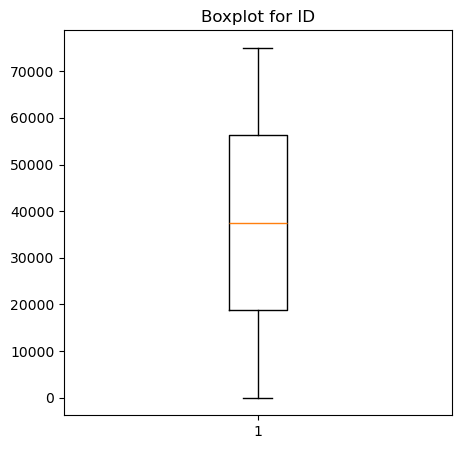

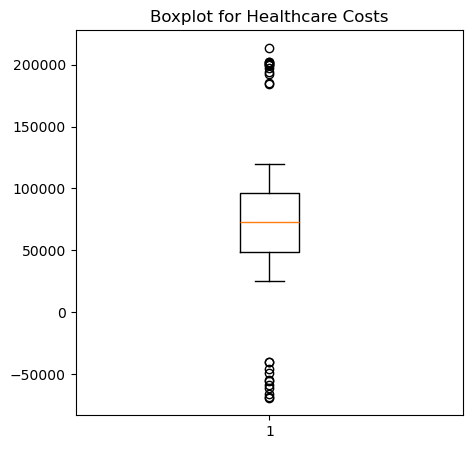

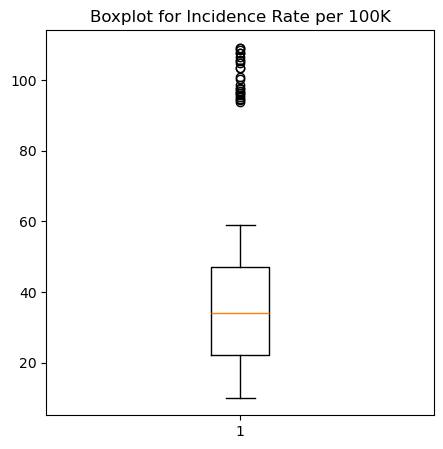

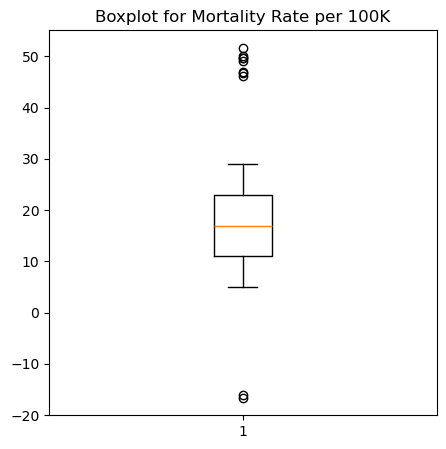

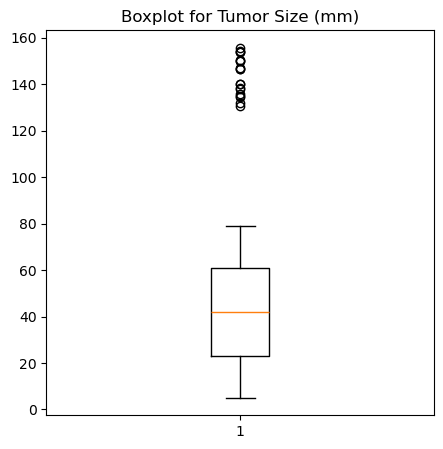

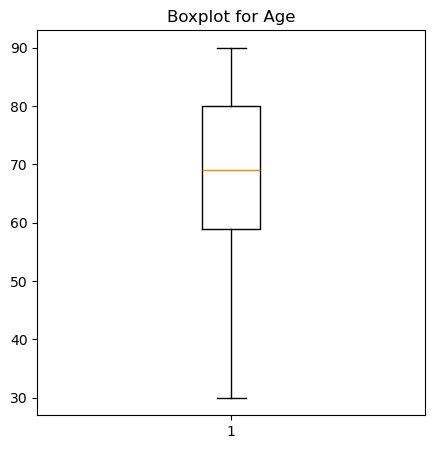

In [403]:
for col in train_df.select_dtypes(include = 'number'):
    plt.figure(figsize = (5,5))
    plt.boxplot(train_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [404]:
def remove_outliers(df, *cols):
    df_cleaned = df.copy()
    for col in cols:
        q1 = np.percentile(df_cleaned[col], 25)
        q3 = np.percentile(df_cleaned[col], 75)
        iqr = q3-q1
        lower_limit = q1 - 1.5*iqr
        upper_limit = q3 + 1.5*iqr
        df_cleaned = df_cleaned[(df_cleaned[col]>=lower_limit) & (df_cleaned[col]<= upper_limit)]
    return df_cleaned

In [405]:
df_cleaned = remove_outliers(train_df, 'Healthcare Costs')

In [406]:
df_cleaned = remove_outliers(test_df, 'Healthcare Costs')

<Axes: xlabel='Healthcare Costs'>

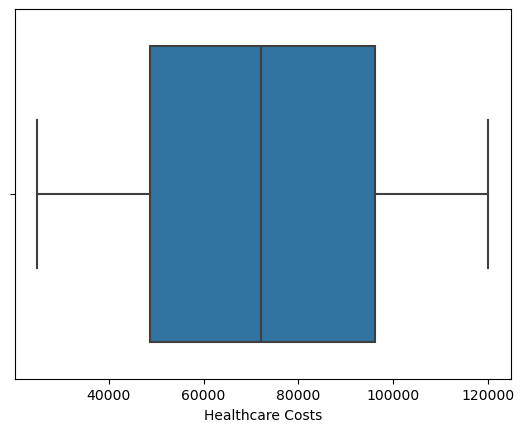

In [407]:
sns.boxplot(x = df_cleaned['Healthcare Costs'])

In [408]:
df_cleaned = remove_outliers(train_df, 'Incidence Rate per 100K')

In [409]:
df_cleaned = remove_outliers(test_df, 'Incidence Rate per 100K')

<Axes: xlabel='Incidence Rate per 100K'>

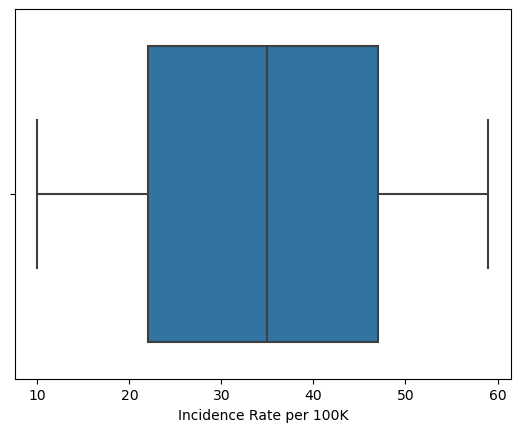

In [410]:
sns.boxplot(x = df_cleaned['Incidence Rate per 100K'])

In [411]:
df_cleaned = remove_outliers(train_df, 'Mortality Rate per 100K')

In [412]:
df_cleaned = remove_outliers(test_df, 'Mortality Rate per 100K')

<Axes: xlabel='Mortality Rate per 100K'>

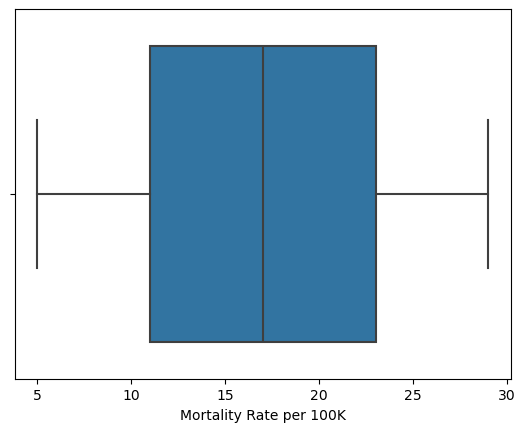

In [413]:
sns.boxplot(x = df_cleaned['Mortality Rate per 100K'])

In [414]:
df_cleaned = remove_outliers(train_df, 'Tumor Size (mm)')

In [415]:
df_cleaned = remove_outliers(test_df, 'Tumor Size (mm)')

<Axes: xlabel='Tumor Size (mm)'>

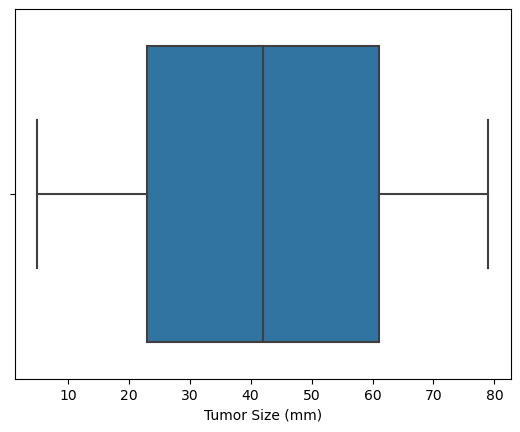

In [416]:
sns.boxplot(x = df_cleaned['Tumor Size (mm)'])

In [417]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,73918.0,37505.352472,21660.565139,1.000000,18745.25,37509.5,56256.75,75035.000000
Healthcare Costs,73918.0,72568.033887,27529.538738,-69123.238747,48835.50,72541.0,96449.75,213690.042716
Incidence Rate per 100K,73918.0,34.543220,14.506157,10.000000,22.00,34.0,47.00,109.212990
Mortality Rate per 100K,73918.0,17.057707,7.208605,-16.612959,11.00,17.0,23.00,51.679554
Tumor Size (mm),73918.0,42.039122,21.739084,5.000000,23.00,42.0,61.00,155.758628
Age,73918.0,69.375835,11.862609,30.000000,59.00,69.0,80.00,90.000000


In [418]:
train_df.drop(columns = ['ID'], inplace = True)

In [420]:
train_df

,Alcohol Consumption,Cancer Stage,Country,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,Healthcare Access,Healthcare Costs,Heart Disease History,Hypertension,Incidence Rate per 100K,Inflammatory Bowel Disease,Insurance Costs,Insurance Status,Mortality Rate per 100K,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Treatment Type,Tumor Size (mm),Urban or Rural,Survival Prediction,Age
0,No,Localized,UK,No,No,Moderate,No,No,Male,No,High,76553.0,No,Yes,37.0,No,Basic,Uninsured,25.0,Yes,Overweight,Low,Regular,No,Chemotherapy,33.0,Urban,Yes,59
1,No,Regional,Japan,No,No,Low,No,No,Male,No,Moderate,62805.0,No,No,54.0,Yes,No insurance,Uninsured,27.0,No,Normal,Low,Irregular,Yes,Chemotherapy,17.0,Urban,No,67
2,No,Localized,France,No,No,Low,Yes,No,Male,No,High,66425.0,No,No,15.0,Yes,Extended,Insured,27.0,No,Normal,Moderate,Never,Yes,Surgery,34.0,Urban,Yes,66
3,Yes,Localized,Japan,Yes,No,Moderate,No,No,Male,No,Moderate,82764.0,No,No,41.0,Yes,Basic,Uninsured,19.0,Yes,Obese,Low,Regular,No,Radiotherapy,71.0,Urban,No,69
4,No,Regional,USA,No,No,Moderate,Yes,Yes,Male,No,Low,47269.0,No,No,23.0,No,Basic,Insured,11.0,Yes,Overweight,Low,Regular,No,Radiotherapy,48.0,Rural,Yes,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75029,No,Localized,South Korea,No,No,Moderate,Yes,No,Male,Yes,Moderate,92265.0,No,No,36.0,No,No insurance,Insured,12.0,Yes,Obese,Moderate,Irregular,No,Combination,37.0,Urban,No,54
75030,Yes,Localized,Italy,No,No,High,No,No,Male,No,Moderate,70574.0,Yes,No,58.0,No,No insurance,Insured,10.0,Yes,Obese,Moderate,Regular,No,Chemotherapy,42.0,Urban,No,53
75031,Yes,Localized,USA,No,No,Low,Yes,No,Male,No,Moderate,77430.0,No,No,52.0,No,No insurance,Uninsured,29.0,Yes,Overweight,Moderate,Regular,No,Chemotherapy,38.0,Urban,No,71
75033,No,Localized,South Africa,No,No,High,Yes,No,Female,No,Moderate,108752.0,No,Yes,32.0,No,No insurance,Insured,17.0,Yes,Obese,Low,Never,No,Surgery,50.0,Rural,Yes,74


VISUALIZATION TO EXPLAIN THE DATASET 

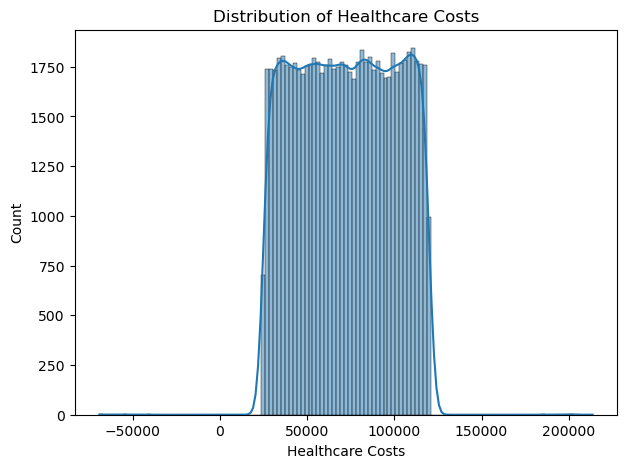

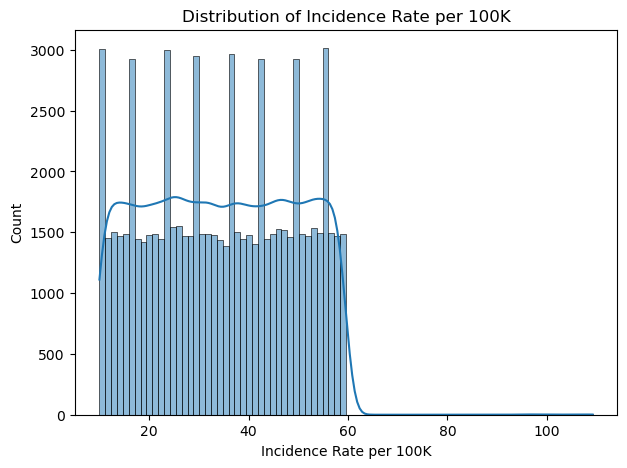

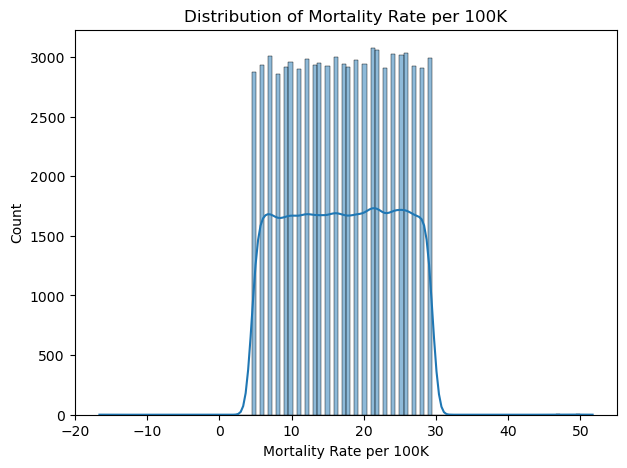

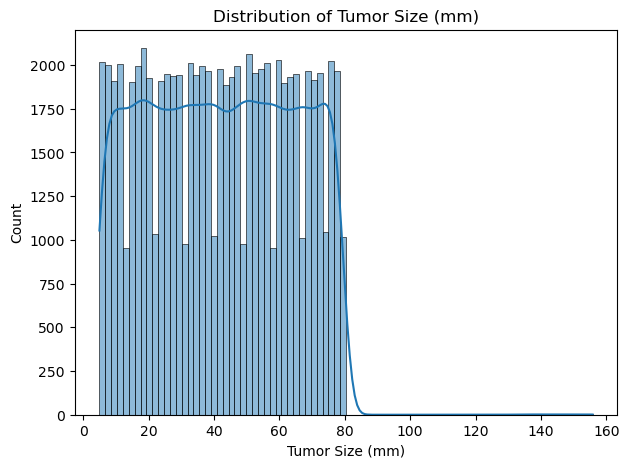

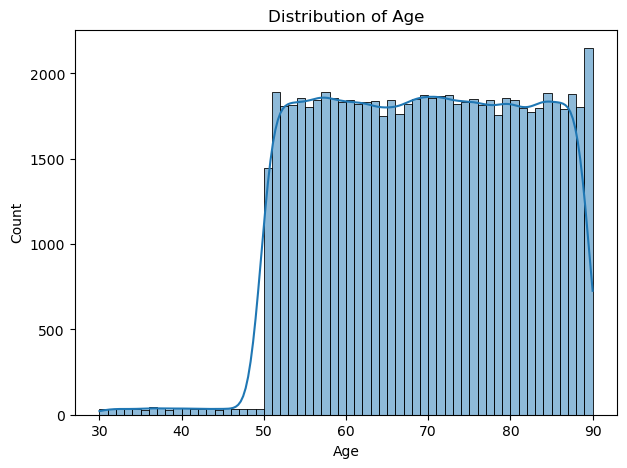

In [421]:
for col in train_df.select_dtypes('number'):
    plt.figure(figsize = (7,5))
    sns.histplot(train_df[col], kde =  True)
    plt.title(f"Distribution of {col}")
    plt.show()

THIS WAS DONE TO CHECK FOR DATA IMBALANCE

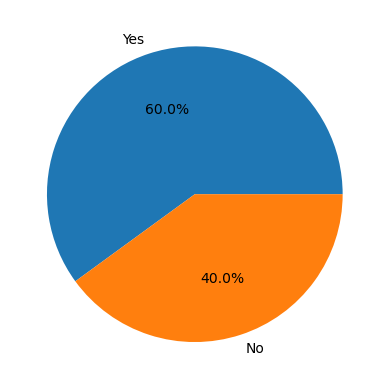

In [422]:
plt.pie(train_df['Survival Prediction'].value_counts(), labels = train_df['Survival Prediction'].unique(), autopct = '%1.1f%%')
plt.show()

AFTER SOME CLEANING, EDA AND OTHER THINGS IT IS TIME TO PREPARE THE DATA FOR MODELLING

In [423]:
models = {
    'Ada Boost' : AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'XGB' :XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier()

}
sampling_techniques = {
    'SMOTE': SMOTE(),
    'RandomOversampler': RandomOverSampler(),
    'RandomUnderSampler': RandomUnderSampler(),
    'ADASYN': ADASYN()
}


In [424]:
train_df['Survival Prediction']  = train_df['Survival Prediction'].replace({'No': 0, 'Yes':1})

In [425]:
X = train_df.drop(columns = ['Survival Prediction'])
y = train_df['Survival Prediction']

In [426]:
cat_col = X.select_dtypes(include = 'object').columns
num_col = X.select_dtypes(include = 'number').columns

In [427]:
class Train_model:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def train_evaluate_model(self):
        results = []
        X_train, test_df, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state = 44)
        
        cat_col_pipeline = Pipeline([
              ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
              ('imputer', SimpleImputer(strategy = 'most_frequent'))
        ])
    
        num_col_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('imputer', SimpleImputer(strategy = 'mean'))
        ])
    
        transformer = ColumnTransformer([
            ('cat_col', cat_col_pipeline, cat_col),
            ('num_col', num_col_pipeline, num_col)
        ])
        
        for model_name, model in models.items():
            for over_sampler_name, over_sampler in sampling_techniques.items():
                pipeline = ipipeline([
                    ('transformer', transformer),
                    ('over_sampler_name', over_sampler),
                    ('model_name', model)
                ])
                fit_pipeline = pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(test_df)
        
                accuracy = round(accuracy_score(y_test, y_pred), 2)*100
                recall = round(recall_score(y_test, y_pred), 2)*100
                precision = round(precision_score(y_test, y_pred), 2)*100
                f1score = round(f1_score(y_test, y_pred), 2) *100
                error = 100-accuracy
                
        
                results.append({
                    'Over Sampling Techniques' : over_sampler_name,
                    'Model_name': model_name,
                    'Accuracy': accuracy,
                    'Recall': recall,
                    'Precision': precision,
                    'FI-Score': f1score,
                    'Error' : error,
        
                })
    
        results = pd.DataFrame(results).sort_values(by = 'Recall', ascending = False)
        
    
        return results

    def confusion_matrix(self):
        X_train, test_df, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state = 44)
        
        cat_col_pipeline = Pipeline([
              ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
              ('imputer', SimpleImputer(strategy = 'most_frequent'))
        ])
    
        num_col_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('imputer', SimpleImputer(strategy = 'mean'))
        ])
    
        transformer = ColumnTransformer([
            ('cat_col', cat_col_pipeline, cat_col),
            ('num_col', num_col_pipeline, num_col)
        ])
        
        for model_name, model in models.items():
            for over_sampler_name, over_sampler in sampling_techniques.items():
                pipeline = ipipeline([
                    ('transformer', transformer),
                    ('over_sampler_name', over_sampler),
                    ('model_name', model)
                ])
                fit_pipeline = pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(test_df)
    
                cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
                plt.figure(figsize = (7,5))
                cm.plot()
                plt.title(f"Confusion matrix for {over_sampler_name} technique using {model_name}")
                plt.show()

DIFFERENT MODELS AND SAMPLERS ARE USED SO I CAN PICK THE BEST ONE TO USE FOR DEPLOYMENT

In [428]:
Train_model(X, y).train_evaluate_model()

,Over Sampling Techniques,Model_name,Accuracy,Recall,Precision,FI-Score,Error
11,ADASYN,Gradient Boost,60.0,100.0,60.0,75.0,40.0
8,SMOTE,Gradient Boost,60.0,100.0,60.0,75.0,40.0
4,SMOTE,Random Forest,58.0,90.0,60.0,72.0,42.0
15,ADASYN,XGB,58.0,89.0,60.0,71.0,42.0
7,ADASYN,Random Forest,58.0,89.0,60.0,72.0,42.0
12,SMOTE,XGB,58.0,89.0,60.0,72.0,42.0
5,RandomOversampler,Random Forest,57.0,84.0,60.0,70.0,43.0
0,SMOTE,Ada Boost,56.0,83.0,60.0,70.0,44.0
17,RandomOversampler,Decision Tree,52.0,59.0,60.0,60.0,48.0
16,SMOTE,Decision Tree,52.0,58.0,60.0,59.0,48.0


THE BEST PERFORMING MODEL AND SAPMPLER ARE GRADIENT BOOSTING CLASSIFIER AND ADASYN SO THEY ARE BROUGHT OUT AND SAVED FOR MODEL DEPLOYMENT

In [429]:
train_df['Survival Prediction']  = train_df['Survival Prediction'].replace({'No': 0, 'Yes':1})

In [432]:
X = train_df.drop(columns = ['Survival Prediction'])
y = train_df['Survival Prediction']

In [433]:
X_train, test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [434]:
cat_col = X.select_dtypes(include='object').columns
num_col = X.select_dtypes(include='number').columns

In [435]:
cat_col_pipeline = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('imputer', SimpleImputer(strategy = 'most_frequent'))
])

In [436]:
num_col_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

In [437]:
transformer = ColumnTransformer([
    ('cat_col', cat_col_pipeline, cat_col),
    ('num_col', num_col_pipeline, num_col)
])

In [438]:
pipeline = Pipeline([
    ('transformer', transformer),
    ('ADASYN', ADASYN()),
    ('gb', GradientBoostingClassifier())
])

In [439]:
gb_model = pipeline.fit(X_train, y_train)

In [440]:
y_pred = gb_model.predict(test_df)

In [441]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [442]:
print(f"accuracy: {accuracy:2f}, recall: {recall:2f}, f1: {f1:2f}, precision: {precision:2f}")

accuracy: 0.600244, recall: 0.999099, f1: 0.750169, precision: 0.600541


CONFUSION MATRIX SHOWING HOW THE MODEL IS PERFORMING

<Figure size 700x500 with 0 Axes>

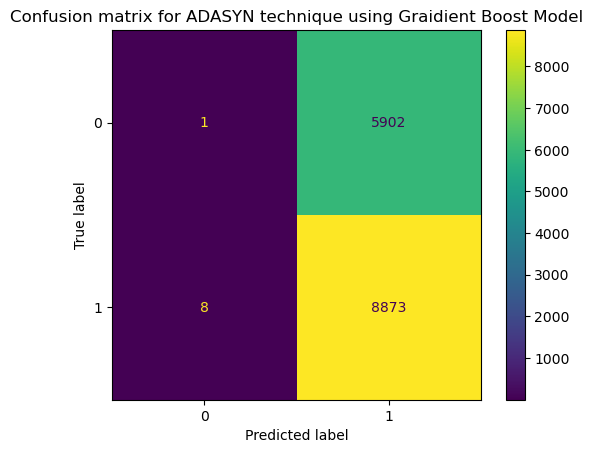

In [499]:
cmatrix = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
plt.figure(figsize=(7, 5))
cm.plot()
plt.title(f"Confusion matrix for ADASYN technique using Graidient Boost Model")
plt.show()

A CSV SAMPLE PREDICTION FILE IS CREATED 

In [466]:
pred_labels = pd.Series(y_pred).map({0: "No", 1: "Yes"})

In [487]:
submission = pd.DataFrame({
    "ID": test_df.index,                   
    "Survival Prediction": pred_labels
})

In [481]:
submission.to_csv("Sample Prediction File.csv", index=False)

In [488]:
gb_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_col',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['Alcohol Consumption', 'Cancer Stage', 'Country', 'Diabetes',
       'Diabetes History', 'Diet Risk', 'Early Detection', 'Family History',
       'Gender', 'Genetic Mutation', 'Health...
       'Physical Activity', 'Screening History', 'Smoking History',
       'Treatment Type', 'Urban or Rural'],
      dtype='object')),
                                                 ('num_col',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Healthcare Costs', 'Incidence Rate per 100K',
       'Mortality Rate per 100K', 'Tumor Size (mm)', 'Age'],
      dtype='object'))])),
                ('ADASYN', ADASYN()), ('gb', GradientBoostingClassifier())])

FINALLY THE MODEL IS SAVED AND READY FOR DEPLOYMENT

In [505]:
import pickle

In [506]:
with open("GradientBoosting.pkl", "wb") as model_file:
    pickle.dump(gb_model, model_file)